## ${\textbf{Libraries}}$

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import scipy

#These are the visualization libraries. Matplotlib is standard and is what most people use.
#Seaborn works on top of matplotlib, as we mentioned in the course.
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import pickle

## ${\textbf{Import Data}}$

In [ ]:
# Load the data, contained in the segmentation data csv file. First column is the customer's ID, so we'll make it an index column.
df_segmentation = pd.read_csv('/content/drive/My Drive/segmentation data.csv', index_col = 0)

## ${\textbf{Explore Data}}$

In [ ]:
# Descriptive analysis of the data set. Here we just look at the data to gain some insight. 
# We do not apply any transformations or changes to the data.
df_segmentation.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
ID,,,,,,,
100000001,0,0,67,2,124670,1,2
100000002,1,1,22,1,150773,1,2
100000003,0,0,49,1,89210,0,0
100000004,0,0,45,1,171565,1,1
100000005,0,0,53,1,149031,1,1


In [ ]:
df_segmentation.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 100000001 to 100002000
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Sex              2000 non-null   int64
 1   Marital status   2000 non-null   int64
 2   Age              2000 non-null   int64
 3   Education        2000 non-null   int64
 4   Income           2000 non-null   int64
 5   Occupation       2000 non-null   int64
 6   Settlement size  2000 non-null   int64
dtypes: int64(7)
memory usage: 125.0 KB


In [ ]:
# change data types of categorical columns to object (string)
"""
for i in df_segmentation[['Sex','Marital status','Education','Occupation','Settlement size']]:
  df_segmentation[i] = df_segmentation[i].astype('object')

df_segmentation.info()
"""

"\nfor i in df_segmentation[['Sex','Marital status','Education','Occupation','Settlement size']]:\n  df_segmentation[i] = df_segmentation[i].astype('object')\n\ndf_segmentation.info()\n"

In [ ]:
# view summary statistics
df_segmentation.describe()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
count,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000
mean,0.457000,0.496500,35.909000,1.03800,120954.419000,0.810500,0.739000
std,0.498272,0.500113,11.719402,0.59978,38108.824679,0.638587,0.812533
min,0.000000,0.000000,18.000000,0.00000,35832.000000,0.000000,0.000000
25%,0.000000,0.000000,27.000000,1.00000,97663.250000,0.000000,0.000000
50%,0.000000,0.000000,33.000000,1.00000,115548.500000,1.000000,1.000000
75%,1.000000,1.000000,42.000000,1.00000,138072.250000,1.000000,1.000000
max,1.000000,1.000000,76.000000,3.00000,309364.000000,2.000000,2.000000


## ${\textbf{Correlation Estimate}}$

In [ ]:
# Compute Pearson correlation coefficient for the features in our data set.
# The correlation method in pandas, it has the Pearson correlation set as default.
df_segmentation.corr()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
Sex,1.000000,0.566511,-0.182885,0.244838,-0.195146,-0.202491,-0.300803
Marital status,0.566511,1.000000,-0.213178,0.374017,-0.073528,-0.029490,-0.097041
Age,-0.182885,-0.213178,1.000000,0.654605,0.340610,0.108388,0.119751
Education,0.244838,0.374017,0.654605,1.000000,0.233459,0.064524,0.034732
Income,-0.195146,-0.073528,0.340610,0.233459,1.000000,0.680357,0.490881
Occupation,-0.202491,-0.029490,0.108388,0.064524,0.680357,1.000000,0.571795
Settlement size,-0.300803,-0.097041,0.119751,0.034732,0.490881,0.571795,1.000000


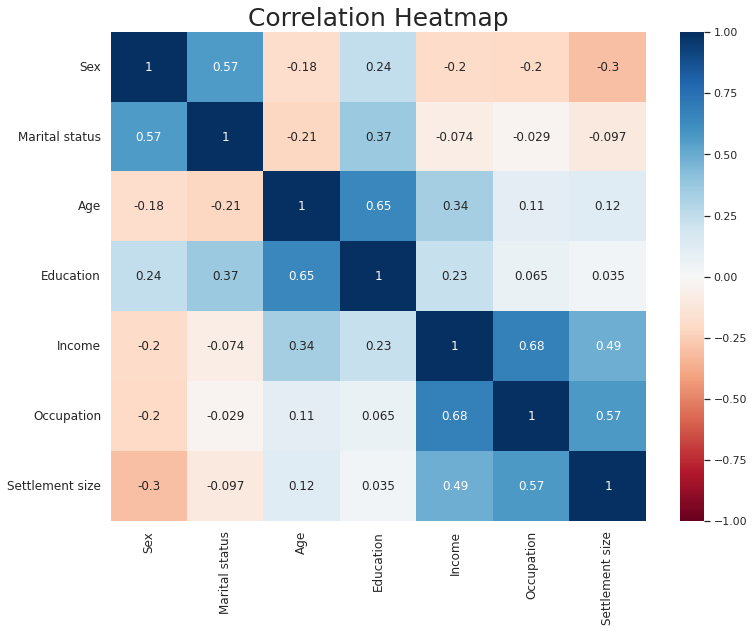

In [ ]:
# We'll plot the correlations using a Heat Map. Heat Maps are a great way to visualize correlations using color coding.
# We use RdBu as a color scheme, but you can use viridis, Blues, YlGnBu or many others.
# We set the range from -1 to 1, as it is the range of the Pearson Correlation. 
# Otherwise the function infers the boundaries from the input.
# In this case they will be -0,25 to 0,68, as they are the minumum and maximum correlation indeces between our features.
plt.figure(figsize = (12, 9)) # figure will be 12 inches wide and 9 inches high
s = sns.heatmap(df_segmentation.corr(),
               annot = True, 
               cmap = 'RdBu',
               vmin = -1, 
               vmax = 1)
s.set_yticklabels(s.get_yticklabels(), rotation = 0, fontsize = 12)
s.set_xticklabels(s.get_xticklabels(), rotation = 90, fontsize = 12)
plt.title('Correlation Heatmap', fontsize = 25)
plt.show()

## ${\textbf{Visualize Raw Data}}$

Text(0.5, 1.0, 'Visualization of raw data')

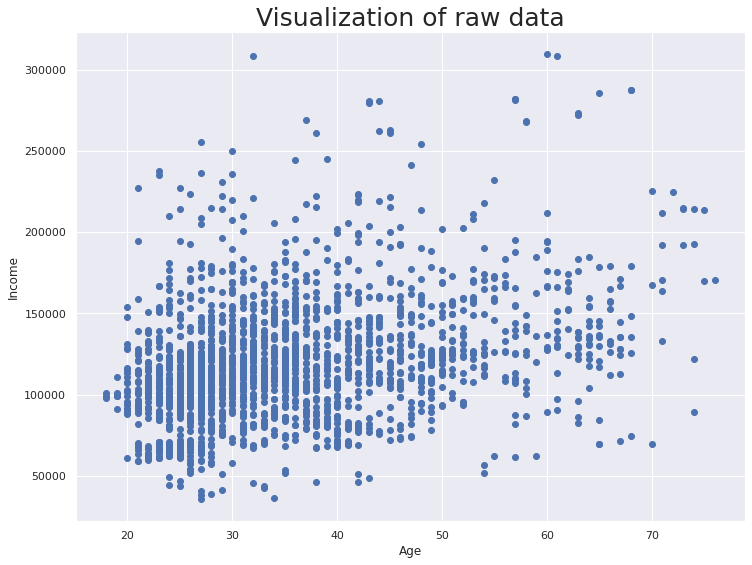

In [ ]:
# We'll plot the data. We create a 12 by 9 inches figure.
# We have 2000 data points, which we'll scatter across Age and Income, located on positions 2 and 4 in our data set. 
plt.figure(figsize = (12, 9))
plt.scatter(df_segmentation.iloc[:, 2], df_segmentation.iloc[:, 4])
plt.xlabel('Age')
plt.ylabel('Income')
plt.title('Visualization of raw data', fontsize = 25)

## ${\textbf{Standardization}}$

In [ ]:
# create an instance of StandardScaler
scaler = StandardScaler()

# standardize segmentation data and store in an array
segmentation_std = scaler.fit_transform(df_segmentation)

## ${\textbf{Hierarchical Clustering}}$

In [ ]:
hier_clust = linkage(segmentation_std, method = 'ward')

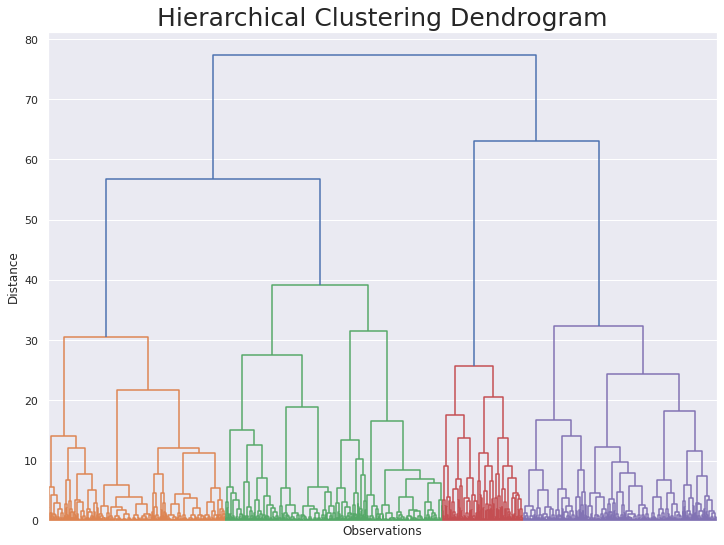

In [ ]:
plt.figure(figsize = (12,9))
plt.title('Hierarchical Clustering Dendrogram', fontsize = 25)
plt.xlabel('Observations')
plt.ylabel('Distance')
dendrogram(hier_clust, show_leaf_counts=False, no_labels = True)
plt.show()

At the bottom of the plot, we have our observations. These are 2000 individual points. 

The goal of our clustering algorithm is to group them together based on their distance. Distances between points are represented by vertical lines. The smaller the distance between points, the further down in the tree they'll be grouped together. This also shows that they are more similar to one another.

A join between two observations or two clusters is represented by a horizontal line linking two vertical lines.

Our dendrogram looks a bit crowded because we plotted all 2000 observations. Let's truncate it a bit so it looks less busy.

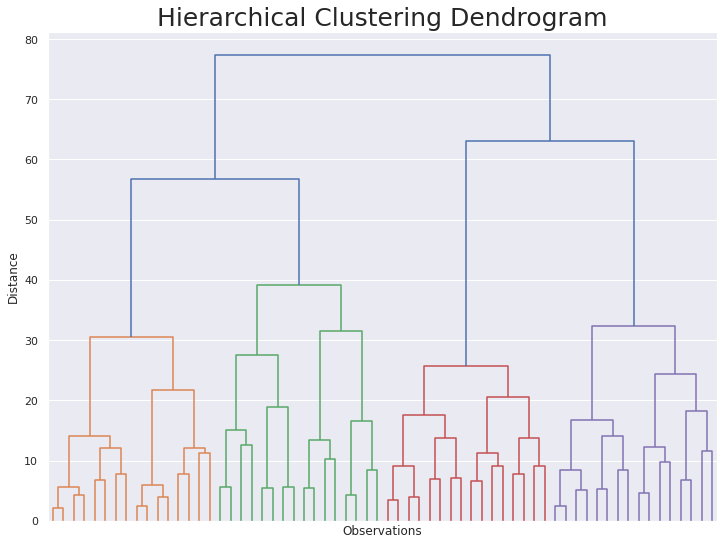

In [ ]:
plt.figure(figsize = (12,9))
plt.title('Hierarchical Clustering Dendrogram', fontsize = 25)
plt.xlabel('Observations')
plt.ylabel('Distance')
dendrogram(hier_clust, show_leaf_counts=False, no_labels = True, truncate_mode = 'level', p = 5)
plt.show()

## ${\textbf{Finding The Clusters}}$

Now we come to the most important part of clustering: finding the clusters.

We need to find a horizontal line in the dendrogram on which to cut. This means that under this line, every vertical line will signal the beginning of a cluster. All the leaves which are connected to the line until the cut will belong to a separate cluster.

Obviously we can cut the dendrogram in many different places. So how do we choose?

Rule of thumb: find the longest vertical line which isn't intercepted by a horizontal line from the dendrogram. This is where we should make the cut.

In [ ]:
# We'll use within clusters sum of squared (WCSS) values to determine the best clustering solution.

# Initialize wcss variable and make it an empty list.
wcss = []

# Run a for loop with 10 iterations to calculate wcss and add the values to the empty list. We can try running the algorithm with a larger number. However, in this particular dataset, it wouldn't improve the results.
for i in range(1,11):
  kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42) # k-means++ is an initialization algorithm that finds the best cluster seeds. The random_state ensures we'll get the same initial centroids if we run the code multiple times and it can be any number.
  kmeans.fit(segmentation_std) # Fits K-Means clustering model using our standardized data with i clusters
  wcss.append(kmeans.inertia_) # add the value stored in the inertia_ attribute to the wcss list

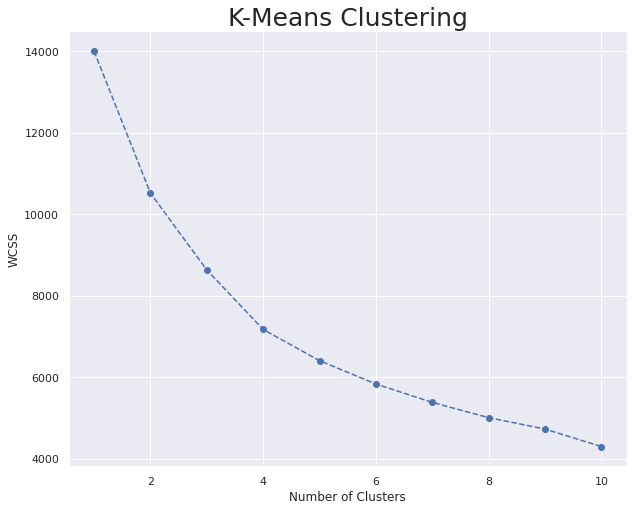

In [ ]:
plt.figure(figsize = (10,8))
plt.plot(range(1,11), wcss, marker = 'o', linestyle = '--')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('K-Means Clustering', fontsize = 25)
plt.show()

We see the function is monotonically decreasing, sometimes it can be rapidly declining, other times more smoothly, depending on the shape of this graph.

We will use the Elbow method to determine the number of clusters. The goal here is to spot the elbow itself and take that many clusters. Usually the part of the graph above the elbow would be steeply declining, while the part after it much smoother.

The elbow in the graph is obviously at 4 (which is the same as the value gotten from hierarchical clustering earlier). This is the only place until which the graph is steeply declining while smoothing out afterwards.

${\textbf{Note:}}$ Because we have only four clusters, the algorithm with more than 10 iterations will not yield an improvement in the results. But in cases where there are more clusters, a loop with more iterations should be performed.

In [ ]:
# now we can perform K-Means clustering with 4 clusters
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)

In [ ]:
# fit the data with our standardized data
kmeans.fit(segmentation_std)

KMeans(n_clusters=4, random_state=42)

## ${\textbf{Results}}$

In [ ]:
# We have segmented our data successfully. Now let's analyze the results

# First make a copy of our segmentation dataframe
df_segm_kmeans = df_segmentation.copy()

# Add a new column called 'Segment K-Means' which will contain the predicted clusters for each observation in our data. The predictions can be extracted from the labels attribute.
df_segm_kmeans['Segment K-Means'] = kmeans.labels_

In [ ]:
# To gain some insight, let's calculate the mean values of each features by clusters
df_segm_analysis = df_segm_kmeans.groupby(['Segment K-Means']).mean()
df_segm_analysis

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
Segment K-Means,,,,,,,
0,0.501901,0.692015,55.703422,2.129278,158338.422053,1.129278,1.110266
1,0.352814,0.019481,35.577922,0.746753,97859.852814,0.329004,0.043290
2,0.853901,0.997163,28.963121,1.068085,105759.119149,0.634043,0.422695
3,0.029825,0.173684,35.635088,0.733333,141218.249123,1.271930,1.522807


Let's now interprete the 4 segments obtained.

${\textbf{1st segement}}$: It is composed of men and women almost equally, with an average age of 56. Comparing this mean age with the other clusters, we realize that this is the oldest segment. More than two-thirds are in relationships, and they also have the highest level of education, as well as the highest income. We could call this segment ${\textbf{well-off}}$ people.

${\textbf{2nd segment}}$: Two-thirds are male and almost all are single. Their average age is 36 years and their education level is low on average. Compared to other segments in terms of salary and jobs, this segment has the lowest values under a hundred thousand for annual salary. Also, they live almost exclusively in small cities. So these are people in their 30s with a relatively low income living in small cities. Tt seems that this is a segment of people with ${\textbf{fewer opportunities}}$.

${\textbf{3rd segment}}$: These are people in relationships with an average age of 29. This is the youngest segment. They have a medium level of education, average income and middle management jobs. They seem equally distributed between small, mid-sized and big cities, so they seem average in just about every parameter. We can label the segment average or ${\textbf{standard}}$.

${\textbf{4th segment}}$: It is comprised almost entirely of men, less than 20 percent of whom are in relationships. Looking at the numbers, we observe relatively low values for education, paired with high values for income and occupation. The majority of this segment lives in big or middle sized cities. It appears people in this segment are ${\textbf{career focused}}$.

In [ ]:
# Let's see the size of the clusters (or segments) and their proportions compared to the entire dataset.
df_segm_analysis['N Obs'] = df_segm_kmeans[['Segment K-Means', 'Sex']].groupby(['Segment K-Means']).count() # Note that we included a 2nd column to count each row in the table. You can choose an arbitrary column. We chose 'Sex'

# Let's also calculate the proportions of these segments
df_segm_analysis['Prop Obs'] = df_segm_analysis['N Obs'] / df_segm_analysis['N Obs'].sum()
df_segm_analysis

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,N Obs,Prop Obs
Segment K-Means,,,,,,,,,
0,0.501901,0.692015,55.703422,2.129278,158338.422053,1.129278,1.110266,263,0.1315
1,0.352814,0.019481,35.577922,0.746753,97859.852814,0.329004,0.043290,462,0.2310
2,0.853901,0.997163,28.963121,1.068085,105759.119149,0.634043,0.422695,705,0.3525
3,0.029825,0.173684,35.635088,0.733333,141218.249123,1.271930,1.522807,570,0.2850


In [ ]:
# Lets' rename the segments
df_segm_analysis.rename({
      0: 'Well-off',
      1: 'Fewer opportunities',
      2: 'Standard',
      3: 'Career-focused'
})

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,N Obs,Prop Obs
Segment K-Means,,,,,,,,,
Well-off,0.501901,0.692015,55.703422,2.129278,158338.422053,1.129278,1.110266,263,0.1315
Fewer opportunities,0.352814,0.019481,35.577922,0.746753,97859.852814,0.329004,0.043290,462,0.2310
Standard,0.853901,0.997163,28.963121,1.068085,105759.119149,0.634043,0.422695,705,0.3525
Career-focused,0.029825,0.173684,35.635088,0.733333,141218.249123,1.271930,1.522807,570,0.2850


We can see that there are 263 individuals or 13 percent of the entire data in the well-off segment, so this is the smallest segment.

The largest segment is the third one, standard, which is comprised of 35 percent of all individuals in between.

We see that the career-focused and fewer opportunities segments contain 570 and 462 persons, respectively.

In [ ]:
# As a last step, let's visualize our segmented data.
# Note that we'll be plotting the raw data and not the standardized data. The only difference is that this time, we'll have the renamed segments.

df_segm_kmeans['Labels'] = df_segm_kmeans['Segment K-Means'].map({
    0: 'Well-off',
    1: 'Fewer opportunities',
    2: 'Standard',
    3: 'Career-focused'
})

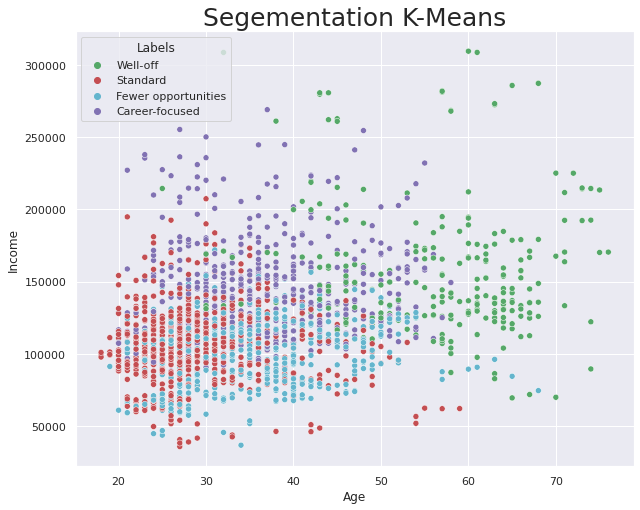

In [ ]:
# Create plot

# Initialize x and y axis for convenience
x_axis = df_segm_kmeans['Age']
y_axis = df_segm_kmeans['Income']

# Create scatter plot of income and age
plt.figure(figsize = (10, 8))
sns.scatterplot(x = x_axis, y = y_axis, hue = df_segm_kmeans['Labels'], palette = ['g','r','c','m']) # Uses the segments as colors by assigning to hue. Also uses the same color palette as hierarchical clustering: red, green, cyan & magenta
plt.title('Segementation K-Means', fontsize = 25)
plt.show()

We can see the green segment, well-off, is clearly separated as it is highest in both age and income.

Unfortunately, the other three are grouped together, so it's harder to get more insight just by looking at the plot.

We can conclude that K-Means did a decent job at separating our data into clusters. However, the result is far from perfect, so we're interested to see how we can get even more out of it.

As a next step, we'll combine K-Means with principal component analysis and try to get a better result.

## ${\textbf{PCA For Dimensionality Reduction}}$

In [ ]:
# create an instance of PCA
pca = PCA()

# fit with standardized data
pca.fit(segmentation_std)

PCA()

PCA essentially creates as many components as there are features in our data, in our case 7.

Moreover, these components are arranged in order of importance. In case you're wondering, "importance" indicates how much of the variance of our data is explained by each component.

In [ ]:
# Call the explain variance ratio attribute to actually check what happened.
pca.explained_variance_ratio_

array([0.35696328, 0.26250923, 0.18821114, 0.0755775 , 0.05716512,
       0.03954794, 0.02002579])

We can see that there are 7 components. In essence, PCA applied a linear transformation on our data, which created 7 new variables. Now, some of them contain a large proportion of the variance, while others almost none. Together, these 7 components explain 100 percent of the variability of the data. That's why if you sum up all the numbers, you'll get 1.

We observe that the first component explains around 36 percent of the variability of the data.

The second one, 26%, the third 19% and so on.

And the last component explains only 2% of the information.

So our task now will be to select a subset of components while preserving as much information as possible.

Logically, we want to include the most prominent components, therefore, if we want to choose two components, we would choose the first two as they contain most of the variants. If we opt for three, we would take the first three and so on.

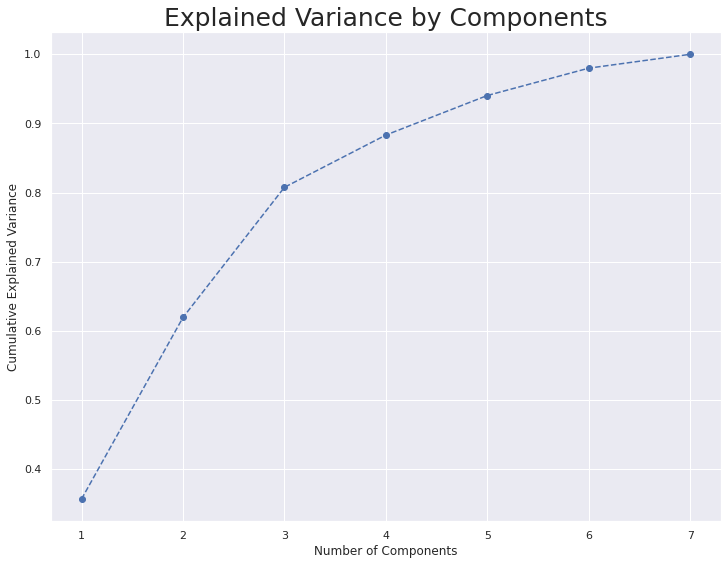

In [ ]:
# Let's plot the number of components that we can choose so that 1 to 7 appear on the X axis and the cumulative explained variance ratio on the Y axis.
# To achieve the latter, we simply take the respective attribute and apply the cumulative sum method on it.

plt.figure(figsize = (12,9))
plt.plot(range(1,8), pca.explained_variance_ratio_.cumsum(), marker = 'o', linestyle = '--')
plt.title('Explained Variance by Components', fontsize = 25)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

This visual helps us decide how many components to keep in our dimensionality reduction.

If we choose 2 components, we can see that we preserve around 60% of the information.

If we choose 3 components, around 80% will be preserved while 4 components will keep almost 90% of the initial variability.

So how do we actually choose the number of components?

${\textbf{Rule of thumb:}}$ Keep at least 70 to 80% of the explained variance.

In this case, keeping 3 or 4 components makes sense. Both of them would reduce 
our features significantly while preserving most of the information.

Let's choose 3 components.

In [ ]:
# Write the relevant code to keep only 3 components
pca = PCA(n_components = 3)
pca.fit(segmentation_std)

PCA(n_components=3)

## ${\textbf{PCA Results}}$

In [ ]:
# Obtain more information about the 3 components
pca.components_

array([[-0.31469524, -0.19170439,  0.32609979,  0.15684089,  0.52452463,
         0.49205868,  0.46478852],
       [ 0.45800608,  0.51263492,  0.31220793,  0.63980683,  0.12468314,
         0.01465779, -0.06963165],
       [-0.29301261, -0.44197739,  0.60954372,  0.27560461, -0.16566231,
        -0.39550539, -0.29568503]])

The result is a 3 X 7 array (reduced to 3 from the original 7).

The values show the loadings. Loadings are correlations between an original variable and the component. For instance, the first value of the array, -0.31469524, shows the loading of the first feature on the first component. It's kind of difficult to glimpse into this array.

We want to get a better idea of the relationship between components and original features.

In [ ]:
# So let's put this information in a panda's data frame where the data comes from PCA components, while
# the columns come from the original column values of the segmentation data frame.
# We can also set the index to be equal to the components: one, two and three.

df_pca_comp = pd.DataFrame(data = pca.components_,
                           columns = df_segmentation.columns.values,
                           index = ['Component 1', 'Component 2', 'Component 3'])

df_pca_comp

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
Component 1,-0.314695,-0.191704,0.326100,0.156841,0.524525,0.492059,0.464789
Component 2,0.458006,0.512635,0.312208,0.639807,0.124683,0.014658,-0.069632
Component 3,-0.293013,-0.441977,0.609544,0.275605,-0.165662,-0.395505,-0.295685


Notice that all values are between -1 and 1 as they are essentially correlations. This means the closer result is to zero, the lower the loading of a variable onto a component.

Visualizing data is the best way to understand it, so let's use a heatmap.

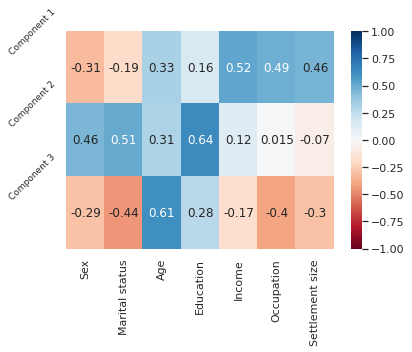

In [ ]:
sns.heatmap(
    df_pca_comp,
    vmin = -1, 
    vmax = 1, # specifies boundaries of the heat map to be -1 and 1
    cmap = 'RdBu',
    annot = True # retains the correlation coefficients
)

plt.yticks(
    [0,1,2],
    ['Component 1', 'Component 2', 'Component 3'],
    rotation = 45,
    fontsize = 9)

plt.show()

There is a positive correlation between component 1 and age, income, occupation and settlement size. As you can guess, these all relate strictly to the career of a person. So this component shows the career focus of the individual.

For component 2, sex, marital status and education are by far the most prominent determinants. You can also see that all career related features are almost uncorrelated with it. Therefore, this component doesn't refer to the career, but rather to an individual's education and lifestyle.

Regarding the final component, we realize that age, marital status and occupation are the most important determinants here. We observed that marital status and occupation load negatively but are still important. That's because we determine the importance of the individual loadings with respect to their absolute values. So the three important aspects of the component 3 indicate the experience a person has, whether work experience or life experience.

But how is our data related to these new features? Well, our original data refers to the original 7 features. Therefore it is 7 dimensional. We must transform it into 3 dimensional.

In [ ]:
pca.transform(segmentation_std)

array([[ 2.51474593,  0.83412239,  2.1748059 ],
       [ 0.34493528,  0.59814564, -2.21160279],
       [-0.65106267, -0.68009318,  2.2804186 ],
       ...,
       [-1.45229829, -2.23593665,  0.89657125],
       [-2.24145254,  0.62710847, -0.53045631],
       [-1.86688505, -2.45467234,  0.66262172]])

The result is a new array where each observation is described by the 3 components. That's why there are only 3 columns, one for each of the new features.

These new values we obtained are called PCA scores, therefore we can save them in a variable and continue with our analysis.

In [ ]:
scores_pca = pca.transform(segmentation_std)

## ${\textbf{K-Means Clustering With PCA}}$

In [ ]:
# Reuse wcss code from above
wcss = []

for i in range(1,11):
  kmeans_pca = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
  kmeans_pca.fit(scores_pca)
  wcss.append(kmeans_pca.inertia_)

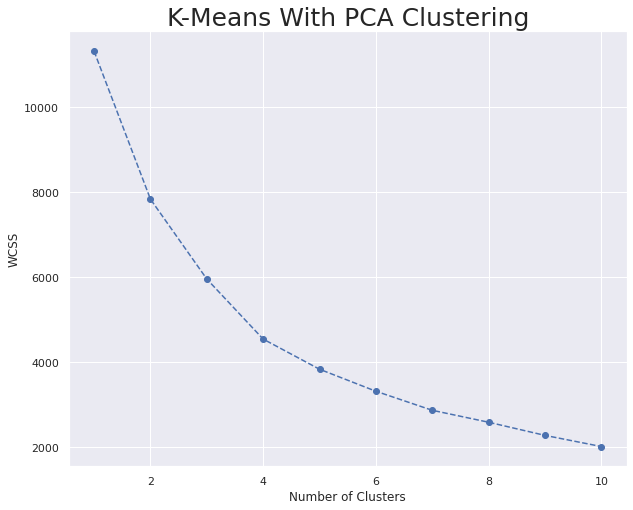

In [ ]:
# Let's visualize the within clusters, sum of squares (WCSS) by number of clusters
plt.figure(figsize = (10,8))
plt.plot(range(1,11), wcss, marker = 'o', linestyle = '--')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('K-Means With PCA Clustering', fontsize = 25)
plt.show()

Using the elbow method to pick the no. of clusters, we arrive at 4.

In [ ]:
# Create a K-Means PCA model with 4 clusters, using the same initializer and random state as before.
kmeans_pca = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)

 # Fit the model with the PCA scores
kmeans_pca.fit(scores_pca)

KMeans(n_clusters=4, random_state=42)

## ${\textbf{K-Means Clustering With PCA Results}}$

In [ ]:
# Create a new dataframe by adding the values of the separate components (stored in the scores_pca variable) to our segmentation data set.
df_segm_pca_kmeans = pd.concat([df_segmentation.reset_index(drop = True), pd.DataFrame(scores_pca)], axis = 1)

# Label them Component 1, 2 & 3
df_segm_pca_kmeans.columns.values[-3: ] = ['Component 1', 'Component 2', 'Component 3']

# Append the kmeans PCA labels to the dataframe
df_segm_pca_kmeans['Segment K-Means PCA'] = kmeans_pca.labels_

In [ ]:
df_segm_pca_kmeans

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Component 1,Component 2,Component 3,Segment K-Means PCA
0,0,0,67,2,124670,1,2,2.514746,0.834122,2.174806,3
1,1,1,22,1,150773,1,2,0.344935,0.598146,-2.211603,0
2,0,0,49,1,89210,0,0,-0.651063,-0.680093,2.280419,2
3,0,0,45,1,171565,1,1,1.714316,-0.579927,0.730731,1
4,0,0,53,1,149031,1,1,1.626745,-0.440496,1.244909,1
...,...,...,...,...,...,...,...,...,...,...,...
1995,1,0,47,1,123525,0,0,-0.866034,0.298330,1.438958,2
1996,1,1,27,1,117744,1,0,-1.114957,0.794727,-1.079871,0
1997,0,0,31,0,86400,0,0,-1.452298,-2.235937,0.896571,2
1998,1,1,24,1,97968,0,0,-2.241453,0.627108,-0.530456,0


To gain some insight, we'll calculate the mean values of each feature by clusters

In [ ]:
df_segm_pca_kmeans_freq = df_segm_pca_kmeans.groupby(['Segment K-Means PCA']).mean()
df_segm_pca_kmeans_freq

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Component 1,Component 2,Component 3
Segment K-Means PCA,,,,,,,,,,
0,0.900289,0.965318,28.878613,1.060694,107551.500000,0.677746,0.440751,-1.107019,0.703776,-0.781410
1,0.027444,0.168096,35.737564,0.734134,141525.826758,1.267581,1.480274,1.372663,-1.046172,-0.248046
2,0.306522,0.095652,35.313043,0.760870,93692.567391,0.252174,0.039130,-1.046406,-0.902963,1.003644
3,0.505660,0.690566,55.679245,2.128302,158019.101887,1.120755,1.101887,1.687328,2.031200,0.844039


Now we can see this 4 cluster solution. Note that it is different than the one we got before. However, since the components are based on our original features and we still have 4 clusters, we would expect them to be very similar to those we got with K means without PCA.

We said the first component was related to courier, the second to education and lifestyle, while the third to their life and or work experience.

We can see that segment 0 is low on the first component and high on the second. 

Segment 1 shows high values for career but low for education and lifestyle.

Segment 2 is low on both, and segment 3 is the highest on both.

As you can probably recall, our previous four clusters were standard, career focused, fewer opportunities and well off.

Let's see if we can spot the same clusters this time.

Segment 3 is highest on all three components: career, education and lifestyle and experience. We can easily establish that this is the well-off segment.

OK, segment 2, on the other hand, shows the lowest average PCA scores for career and education & lifestyle, but is high on experience. It seems that this is the fewer opportunities cluster.

Segment 1 shows high values for career, but low for education and lifestyle and is somewhat independent from experience. This sounds like a career focused segment.

Finally, we are left with segment 0 which has low career and experience values while normal to high education and lifestyle values. This is our youngest cluster, which we labeled standard in our previous analysis.

Now let's see how many people belong to each cluster.

In [ ]:
# Let's see the size of the clusters (or segments) and their proportions compared to the entire dataset.
df_segm_pca_kmeans_freq['N Obs'] = df_segm_pca_kmeans[['Segment K-Means PCA', 'Sex']].groupby(['Segment K-Means PCA']).count() # Note that we included a 2nd column to count each row in the table. You can choose an arbitrary column. We chose 'Sex'

# Let's also calculate the proportions of these segments
df_segm_pca_kmeans_freq['Prop Obs'] = df_segm_pca_kmeans_freq['N Obs'] / df_segm_pca_kmeans_freq['N Obs'].sum()

# Rename the indexes with the cluster names we've just determined.
df_segm_pca_kmeans_freq = df_segm_pca_kmeans_freq.rename({
    0: 'Standard',
    1: 'Career Focused',
    2: 'Fewer Opportunities',
    3: 'Well-off'
})

df_segm_pca_kmeans_freq

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Component 1,Component 2,Component 3,N Obs,Prop Obs
Segment K-Means PCA,,,,,,,,,,,,
Standard,0.900289,0.965318,28.878613,1.060694,107551.500000,0.677746,0.440751,-1.107019,0.703776,-0.781410,692,0.3460
Career Focused,0.027444,0.168096,35.737564,0.734134,141525.826758,1.267581,1.480274,1.372663,-1.046172,-0.248046,583,0.2915
Fewer Opportunities,0.306522,0.095652,35.313043,0.760870,93692.567391,0.252174,0.039130,-1.046406,-0.902963,1.003644,460,0.2300
Well-off,0.505660,0.690566,55.679245,2.128302,158019.101887,1.120755,1.101887,1.687328,2.031200,0.844039,265,0.1325


The largest segment with 692 individuals is the Standard segment which is followed by the Career Focused group with 583 people, or 29 percent of the whole. Next comes the Fewer Opportunities Group with 460 people, followed by the smallest segment Well-off which contains only 265 or 13 percent of the total number of individuals.

Let's finish off by visualizing our clusters on a 2D plane. What we can do is choose two of the components and use them as axis for the visualization.

The point of PCA was to determine the most important components so we can be absolutely sure that the first two components explain more variance than the third one. So let's visualize the segments with respect to the first two components. 

Before that, we should add the names of the segments to the labels. We just did that for the frequency data frame, but we haven't done it in the main one.

In [ ]:
df_segm_pca_kmeans['Legend'] = df_segm_pca_kmeans['Segment K-Means PCA'].map({
    0: 'Standard',
    1: 'Career Focused',
    2: 'Fewer Opportunities',
    3: 'Well-off'
})

Done. Now we can plot the data.

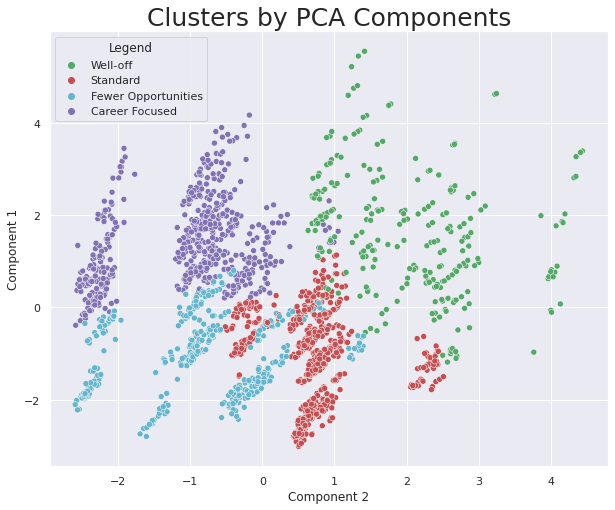

In [ ]:
x_axis = df_segm_pca_kmeans['Component 2']
y_axis = df_segm_pca_kmeans['Component 1']
plt.figure(figsize = (10,8))
sns.scatterplot(x = x_axis, y = y_axis, hue= df_segm_pca_kmeans['Legend'], palette = ['g','r','c','m'])
plt.title('Clusters by PCA Components', fontsize = 25)
plt.show()

Now we can clearly see that the green segment is the well-off segment. A purple segment is career focused while the red and blue represent the standard and fewer opportunity segments, respectively.

When we plotted the K means clustering solution without PCA, we were only able to distinguish the green segment. But the division based on the components is much more pronounced. That was one of the biggest goals of PCA: to reduce the number of variables by combining them into bigger, more meaningful features.

Not only that, but they are orthogonal to each other. This means that the difference between components is as big as possible.

Although, there is some overlap between the red and blue segment, but as a whole, all four segments are clearly separated. The spots where the two overlap are ultimately determined by the third component, which is not available on this graph.

${\textbf{Please Note:}}$ Now, at this point, we'd like to make something clear. Our dataset contained only a few features from the get go. So when we further reduced the dimensionality using PCA, we found out we only need three components to separate the data. That's the reason why even a two dimensional plot is enough to visually see the separation. This might not always be the case. If you have more features and more components respectively, you might need a different way to represent the results of PCA.

${\textbf{Homework:}}$ Plot the data by the remaining combination of components, that is by Component 1 and 3 and Components 2 and 3.

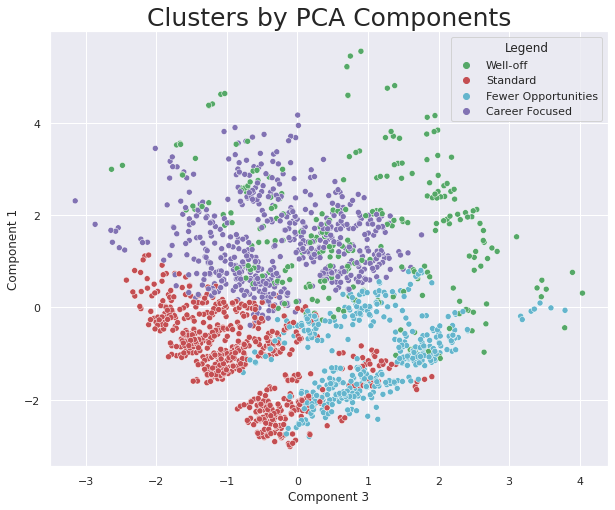

In [ ]:
x_axis = df_segm_pca_kmeans['Component 3']
y_axis = df_segm_pca_kmeans['Component 1']
plt.figure(figsize = (10,8))
sns.scatterplot(x = x_axis, y = y_axis, hue= df_segm_pca_kmeans['Legend'], palette = ['g','r','c','m'])
plt.title('Clusters by PCA Components', fontsize = 25)
plt.show()

We can see there is a more significant overlap between the purple and green segments - that of the career-focused and well-off respectively.

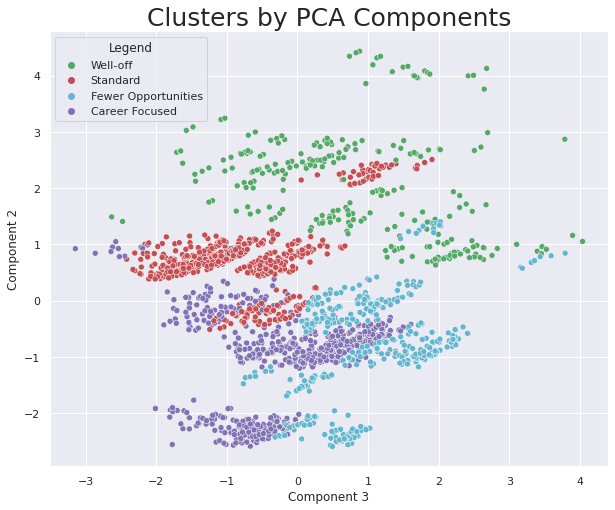

In [ ]:
x_axis = df_segm_pca_kmeans['Component 3']
y_axis = df_segm_pca_kmeans['Component 2']
plt.figure(figsize = (10,8))
sns.scatterplot(x = x_axis, y = y_axis, hue= df_segm_pca_kmeans['Legend'], palette = ['g','r','c','m'])
plt.title('Clusters by PCA Components', fontsize = 25)
plt.show()

We can observe there is significant overlap between the purple and blue segments - the career-focused and fewer-opportunities.

In general, it does not appear that we can separate he clusters easily on this graph. The reason is that the second and third components contain less of the variance of the data set, which is why PCA returns the components in order of importance.

## ${\textbf{Data Export}}$

The first thing we need is our scalar as it contains the mean and standard deviation of our original data. We need the scalar to pre-process future data in the same way as we did here. So let's export it using Pickle.

In [ ]:
# 'pickle.dump' is the command which indicates that we want to export a file. Save the scalar with the extension '.pickle'. As a 2nd argument, write 'wb' which means write bytes.
pickle.dump(scaler, open('scaler.pickle', 'wb'))

In [ ]:
# Do the same for the pca method and the K means with PCA.
These two will allow us to segment new data points based on the criteria we developed here.
pickle.dump(pca, open('pca.pickle', 'wb'))
pickle.dump(kmeans_pca, open('kmeans_pca.pickle', 'wb'))

We'll need all 3 for preprocessing in purchase analytics.